<a href="https://colab.research.google.com/github/Areliortiz/Simulaci-n-/blob/main/AgujaDeBufon_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EXPERIMENTO DE LA  AGUJA DE BUFFON
consiste en la estimación de $\pi$ basado en la probabilidad de cruce de las agujas con las líneas uniformemente espaciadas.

Variables del experimento:
    
$L$: Longitud de la aguja.

   $\theta$: Ángulo.

$X$: Distancia.

$X$ se distribuye entre 0 y $D/2$

$\theta$ se distribuye entre 0 y $\pi$

Calculamos la probabilidad de cruce en las lineas:

La proyección de la aguja en la dirección perpendicular es:
$
\left(\frac{L}{2}\right) \sin(\theta)
$

La condición para que la aguja cruce una línea es:
$
\left(\frac{L}{2}\right) \sin(\theta) \geq X
$

Derivación de $\pi$:

Buscamos la probabilidad $p$ de que la aguja cruce una línea:
$
p = \frac{1}{D/2} \frac{1}{\pi} \int_{0}^{\pi} \int_{0}^{\left(\frac{L}{2}\right) \sin(\theta)} dx \, d\theta
$

$
p = \frac{2}{D \pi} \int_{0}^{\pi} \left(\frac{L}{2}\right) \sin(\theta) \, d\theta
$

$
p = \frac{L}{D \pi} \left[-\cos(\theta)\right]_0^{\pi} = \frac{2L}{D \pi}
$\
despejamos $\pi$\
$
\pi \approx \frac{2L n}{D c}
$

donde:

  $n$: Total de lanzamientos.

 $c$: Número de cruces.




##Experimento de la Aguja de Buffon

El experimento de la aguja de Buffon permite la estimación de $\pi$ basado en la probabilidad de que una aguja cruce líneas paralelas uniformemente espaciadas.

$\text{Variables del Experimento}$\
$L$: Longitud de la aguja.\
$\theta$: Ángulo.\
$X$: Distancia.\
$D$: Distancia entre las líneas paralelas.

$\text{Distribución de las Variables}$

$X$ se distribuye entre 0 y \(D/2\).\
$\theta$ se distribuye entre 0 y $\pi$.\

$\text{Cálculo de la Probabilidad de Cruce}$

La proyección de la aguja en la dirección perpendicular es:$
[(\frac{L}{2}) \sin(\theta)
]$

La condición para que la aguja cruce una línea es:
$[
\left(\frac{L}{2}\right) \sin(\theta) \geq X
]$

$\text{Derivación de \(\pi\)}$

Queremos encontrar la probabilidad $p$ de que la aguja cruce una línea:\
$
p = \frac{1}{D/2} \frac{1}{\pi} \int_{0}^{\pi} \int_{0}^{\left(\frac{L}{2}\right) \sin(\theta)} dx \, d\theta
$\

$
p = \frac{2}{D \pi} \int_{0}^{\pi} \left(\frac{L}{2}\right) \sin(\theta) \, d\theta
$


$
p = \frac{L}{D \pi} \left[-\cos(\theta)\right]_0^{\pi} = \frac{2L}{D \pi}
$

Despejamos $\pi:$\
$
\pi \approx \frac{2L n}{D c}
$

donde:\
p=c/n\
n: Número total de lanzamientos.\
c: Número de cruces.

Esta formulación permite estimar $\pi$ basándose en los resultados experimentales del número de cruces de la aguja con las líneas paralelas.


In [1]:
#importamos las librerías
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#codigo para estimar pi en base a la probabilidad de cruce

def cruce(n):
    longitud = 0.5   #Longitud de las aguja
    espacio = 1      #Distancia entre las líneas
    theta = np.random.uniform(0, np.pi, n)            #Generamos ángulos aleatorios para las agujas
    x = np.random.uniform(0, espacio / 2, n)       #Generamos posiciones aleatorias del centro de la aguja respecto a la línea más cercana
    cruza = x <= (longitud / 2) * np.sin(theta)    #Calculamos si la aguja cruza alguna línea
    cruza_total = np.sum(cruza)
    #Estimamos π basado en la probabilidad de cruce
    return (2 * longitud * n) / (espacio * cruza_total)

In [3]:
#generamos el experimento
cruce(500000)

3.1475641001428993

In [9]:
#generamos la simulacion del experimento
n = 1000
repeticion = 10000
y = []
for i in range (1, repeticion):
  y.append(cruce(n))

(array([3.000e+00, 1.260e+02, 9.490e+02, 3.000e+03, 3.372e+03, 1.855e+03,
        5.660e+02, 1.100e+02, 1.400e+01, 4.000e+00]),
 array([2.58397933, 2.71468645, 2.84539358, 2.9761007 , 3.10680783,
        3.23751496, 3.36822208, 3.49892921, 3.62963633, 3.76034346,
        3.89105058]),
 <BarContainer object of 10 artists>)

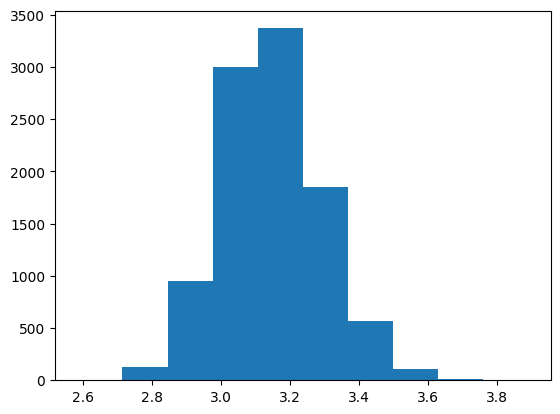

In [10]:
#Creamos el histograma
plt.hist(y)


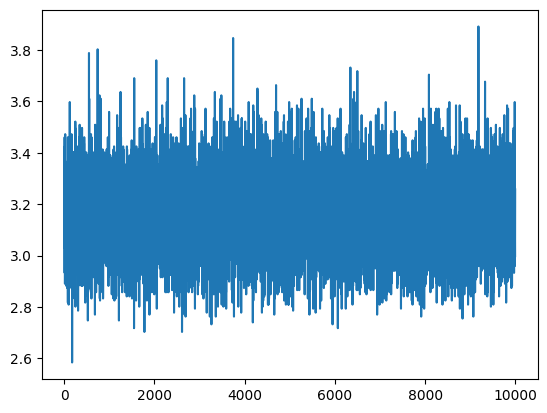

In [11]:
plt.plot(y)

In [ ]:
#calculamos promedio
np.average(y)

3.145751853993938